In [ ]:
https://github.com/Call-for-Code/Spot-Challenge-Wildfires/blob/main/data/Readme_Docs_Wildfires-Datasets_2020-11.pdf 
https://github.com/Call-for-Code/Spot-Challenge-Wildfires 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


In [74]:
df_fires = pd.read_csv('../../../eismas/Jan_30/Historical_Wildfires.csv')
df_weather = pd.read_csv('../../../eismas/Jan_30/HistoricalWeather.csv')
df_wforecast = pd.read_csv('../../../eismas/Jan_30/HistoricalWeatherForecasts.csv')
df_veg = pd.read_csv('../../../eismas/Jan_30/VegetationIndex.csv')

In [ ]:
df_fires.head(2)

In [ ]:
df_weather.head(2)

In [ ]:
df_wforecast.head(2)

In [ ]:
df_veg.head(2)

In [75]:
df_fires['Date'] = pd.to_datetime(df_fires['Date'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_wforecast['Date'] = pd.to_datetime(df_wforecast['Date'])
df_veg['Date'] = pd.to_datetime(df_veg['Date'])


In [76]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='ggplot')

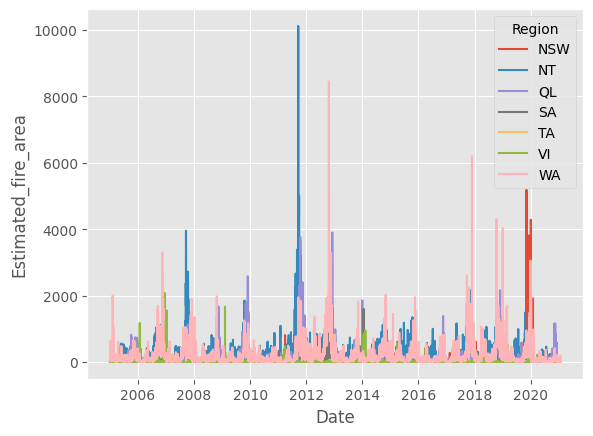

In [77]:
sns.lineplot(data=df_fires, x='Date', y='Estimated_fire_area', hue='Region')
plt.show()

In [78]:
df_fires['yearMonth'] = df_fires['Date'].dt.to_period('M')
df_veg['yearMonth'] = df_veg['Date'].dt.to_period('M')

In [79]:
# prijungiam VegetationIndex lentele
df_fires=df_fires.merge(df_veg, on=['yearMonth','Region'], how='left')

In [80]:
df_fires.rename(columns={'Date_x': 'Date'}, inplace=True)

In [81]:
df_fires = df_fires.merge(
    df_weather[df_weather['Parameter'] == 'Precipitation'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fires.rename(columns={'mean()': 'Precipitation'}, inplace=True)

In [82]:
df_fires = df_fires.merge(
    df_weather[df_weather['Parameter'] == 'RelativeHumidity'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fires.rename(columns={'mean()': 'RelativeHumidity'}, inplace=True)

df_fires = df_fires.merge(
    df_weather[df_weather['Parameter'] == 'SoilWaterContent'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fires.rename(columns={'mean()': 'SoilWaterContent'}, inplace=True)

df_fires = df_fires.merge(
    df_weather[df_weather['Parameter'] == 'SolarRadiation'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fires.rename(columns={'mean()': 'SolarRadiation'}, inplace=True)

df_fires = df_fires.merge(
    df_weather[df_weather['Parameter'] == 'Temperature'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fires.rename(columns={'mean()': 'Temperature'}, inplace=True)

df_fires = df_fires.merge(
    df_weather[df_weather['Parameter'] == 'WindSpeed'][['Date', 'Region', 'mean()']], 
    on=['Date', 'Region'], 
    how='left'
)
df_fires.rename(columns={'mean()': 'WindSpeed'}, inplace=True)

In [83]:
df_fires['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [84]:
df_fires['year'] = df_fires['Date'].dt.year
df_fires['month'] = df_fires['Date'].dt.month
df_fires['day'] = df_fires['Date'].dt.day

In [99]:
nsw = df_fires[df_fires['Region'] == 'NSW']
nt= df_fires[df_fires['Region'] == 'NT']
ql = df_fires[df_fires['Region'] == 'QL']
sa = df_fires[df_fires['Region'] == 'SA']
vi = df_fires[df_fires['Region'] == 'VI']
wa = df_fires[df_fires['Region'] == 'WA']


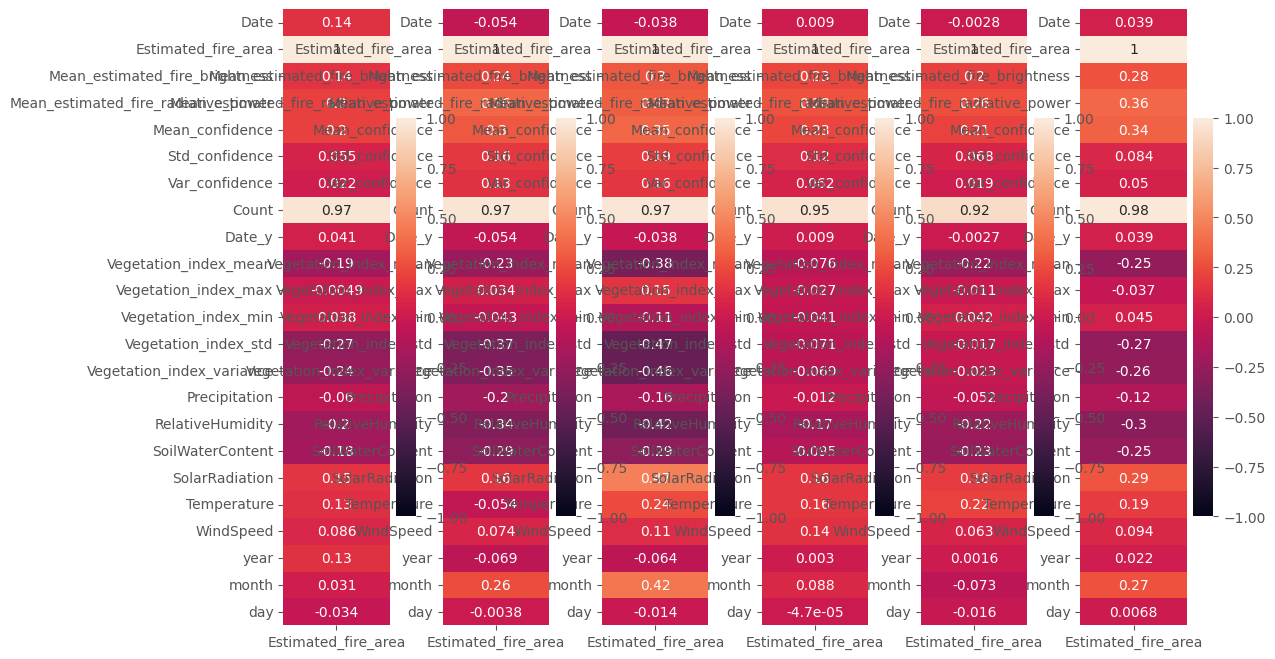

In [86]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6,figsize=(12,8))
# fig, (ax1) = plt.subplots(figsize=(6,8))
sns.heatmap(data=nsw.drop(columns=['yearMonth', 'Region', 'Replaced']).corr()['Estimated_fire_area'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax1)
sns.heatmap(data=nt.drop(columns=['yearMonth', 'Region', 'Replaced']).corr()['Estimated_fire_area'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax2)
sns.heatmap(data=ql.drop(columns=['yearMonth', 'Region', 'Replaced']).corr()['Estimated_fire_area'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax3)
sns.heatmap(data=sa.drop(columns=['yearMonth', 'Region', 'Replaced']).corr()['Estimated_fire_area'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax4)
sns.heatmap(data=vi.drop(columns=['yearMonth', 'Region', 'Replaced']).corr()['Estimated_fire_area'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax5)
sns.heatmap(data=wa.drop(columns=['yearMonth', 'Region', 'Replaced']).corr()['Estimated_fire_area'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax6)
plt.tight_layout()
plt.show()

In [87]:
nsw.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'yearMonth', 'Date_y', 'Vegetation_index_mean',
       'Vegetation_index_max', 'Vegetation_index_min', 'Vegetation_index_std',
       'Vegetation_index_variance', 'Precipitation', 'RelativeHumidity',
       'SoilWaterContent', 'SolarRadiation', 'Temperature', 'WindSpeed',
       'year', 'month', 'day'],
      dtype='object')

In [100]:
drop_columns = ['Region','Std_confidence', 'Var_confidence', 'Count','Replaced', 'yearMonth', 'Date_y',
                'Vegetation_index_max', 'Vegetation_index_min', 'Vegetation_index_std',
       'Vegetation_index_variance']

# 'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power','Mean_confidence'

nsw.drop(columns=drop_columns, inplace=True)
nt.drop(columns=drop_columns, inplace=True)
ql.drop(columns=drop_columns, inplace=True)
sa.drop(columns=drop_columns, inplace=True)
vi.drop(columns=drop_columns, inplace=True)
wa.drop(columns=drop_columns, inplace=True)

nsw.dropna(inplace=True)
nt.dropna(inplace=True)
ql.dropna(inplace=True)
sa.dropna(inplace=True)
vi.dropna(inplace=True)
wa.dropna(inplace=True)


In [ ]:
# Kadangi duomenu datos pabaiga nevisuose sutampa, pasirenakame spėjimų laikotarpį 2020 lapkričio mėnuo

In [101]:
nsw_train = nsw[nsw['Date'] < '2020-11-01']
nsw_test = nsw[(nsw['Date'] >= '2020-11-01') & (nsw['Date'] < '2020-12-01')]
nt_train = nt[nt['Date'] < '2020-11-01']
nt_test = nt[(nt['Date'] >= '2020-11-01') & (nt['Date'] < '2020-12-01')]
ql_train = ql[ql['Date'] < '2020-11-01']
ql_test = ql[(ql['Date'] >= '2020-11-01') & (ql['Date'] < '2020-12-01')]
sa_train = sa[sa['Date'] < '2020-11-01']
sa_test = sa[(sa['Date'] >= '2020-11-01') & (sa['Date'] < '2020-12-01')]
vi_train = vi[vi['Date'] < '2020-11-01']
vi_test = vi[(vi['Date'] >= '2020-11-01') & (vi['Date'] < '2020-12-01')]
wa_train = wa[wa['Date'] < '2020-11-01']
wa_test = wa[(wa['Date'] >= '2020-11-01') & (wa['Date'] < '2020-12-01')]

In [ ]:
wa_test

In [ ]:
vi_test

In [102]:
train_dict = {
    'NSW': nsw_train,
    'NT': nt_train,
    'QL': ql_train,
    'SA': sa_train,
    'VI': vi_train,
    'WA': wa_train 
}

test_dict = {
    'NSW': nsw_test,
    'NT': nt_test,
    'QL': ql_test,
    'SA': sa_test,
    'VI': vi_test,
    'WA': wa_test 
}

In [ ]:
# for k,v in train_dict.items():

#     X = v.drop(columns=['Estimated_fire_area', 'Date'])
#     y = v['Estimated_fire_area'].values      # target
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     print(f'Region: {k}')
#     forest = RandomForestRegressor()
#     forest.fit(X_train, y_train)
#     y_pred = forest.predict(X_test)
#     forest_score = forest.score(X_test, y_test) *100.0
#     print(f'RandomForest score: {forest_score}')
#     mse = np.sqrt(mean_squared_error(y_test, y_pred))
#     print(f"RandomForest mse: {mse}")

#     regressor = DecisionTreeRegressor(random_state=23)
#     regressor.fit(X_train, y_train)
#     y_pred = regressor.predict(X_test)
#     tree_reg_score = forest.score(X_test, y_test) *100.0
#     print(f'DecisionTree score: {tree_reg_score}')

#     mse = np.sqrt(mean_squared_error(y_test, y_pred))
#     print(f"DesicionTree mse: {mse}")

In [103]:
for k1,v1 in train_dict.items():
    for k2, v2 in test_dict.items():
        if k1 == k2:

            X = v1.drop(columns=['Estimated_fire_area', 'Date'])
            y = v1['Estimated_fire_area'].values      # target
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            print(f'Region: {k1}')
            forest = RandomForestRegressor()
            forest.fit(X_train, y_train)
            y_pred = forest.predict(X_test)
            forest_score = forest.score(X_test, y_test) *100.0
            print(f'RandomForest score: {forest_score}')
            mse = np.sqrt(mean_squared_error(y_test, y_pred))
            print(f"RandomForest mse: {mse}")
            r2s = r2_score(y_test, y_pred)
            print(f'RandomForest r2 score: {r2s}')

            regressor = DecisionTreeRegressor(random_state=23)
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            tree_reg_score = forest.score(X_test, y_test) *100.0
            print(f'DecisionTree score: {tree_reg_score}')
            mse = np.sqrt(mean_squared_error(y_test, y_pred))
            print(f"DesicionTree mse: {mse}")
            r2s = r2_score(y_test, y_pred)
            print(f'DesicionTree r2 score: {r2s}')
            
            y_pred_forest = forest.predict(v2.drop(columns=['Estimated_fire_area', 'Date']))
            y_pred_dtree = regressor.predict(v2.drop(columns=['Estimated_fire_area', 'Date']))
            v2['rf'] = y_pred_forest
            v2['dtree'] = y_pred_dtree
    


Region: NSW
RandomForest score: 60.468443955990494
RandomForest mse: 108.41220900148605
RandomForest r2 score: 0.6046844395599049
DecisionTree score: 60.468443955990494
DesicionTree mse: 133.09086983620548
DesicionTree r2 score: 0.4042225668277847
Region: NT
RandomForest score: 79.62657991809111
RandomForest mse: 177.90827741164935
RandomForest r2 score: 0.7962657991809111
DecisionTree score: 79.62657991809111
DesicionTree mse: 313.9684143588122
DesicionTree r2 score: 0.36548257946571117
Region: QL
RandomForest score: 73.4375360477593
RandomForest mse: 122.2272355102313
RandomForest r2 score: 0.7343753604775929
DecisionTree score: 73.4375360477593
DesicionTree mse: 215.75599175790813
DesicionTree r2 score: 0.17232829151384965
Region: SA
RandomForest score: 30.390041414419635
RandomForest mse: 107.07643502626334
RandomForest r2 score: 0.30390041414419633
DecisionTree score: 30.390041414419635
DesicionTree mse: 139.40418317983557
DesicionTree r2 score: -0.17987277629596177
Region: VI
Ran

In [ ]:
# X = nt_train.drop(columns=['Estimated_fire_area', 'Date'])
# y = nt_train['Estimated_fire_area'].values      # target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print('Region: NT')
# forest = RandomForestRegressor()
# forest.fit(X_train, y_train)
# y_pred = forest.predict(X_test)
# forest_score = forest.score(X_test, y_test) *100.0
# print(f'RandomForest score: {forest_score}')
# mse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"RandomForest mse: {mse}")

# regressor = DecisionTreeRegressor(random_state=23)
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)
# tree_reg_score = forest.score(X_test, y_test) *100.0
# print(f'DecisionTree score: {tree_reg_score}')

# mse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"DesicionTree mse: {mse}")

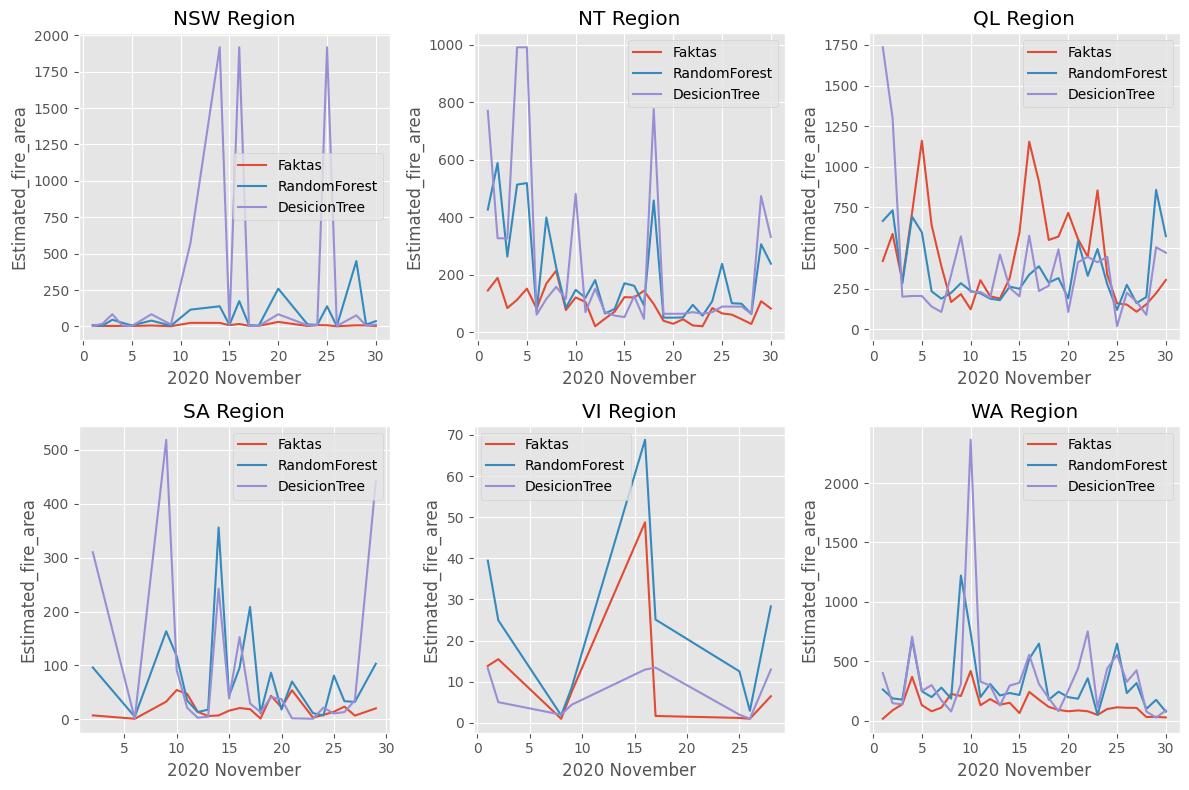

In [104]:
fig, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))
sns.lineplot(data=nsw_test, x='day', y='Estimated_fire_area', label='Faktas', ax=ax1)
sns.lineplot(data=nsw_test, x='day', y='rf', label='RandomForest', ax=ax1)
sns.lineplot(data=nsw_test, x='day', y='dtree', label='DesicionTree', ax=ax1)
ax1.set_title('NSW Region')
ax1.set_xlabel('2020 November')

sns.lineplot(data=nt_test, x='day', y='Estimated_fire_area', label='Faktas', ax=ax2)
sns.lineplot(data=nt_test, x='day', y='rf', label='RandomForest', ax=ax2)
sns.lineplot(data=nt_test, x='day', y='dtree', label='DesicionTree', ax=ax2)
ax2.set_title('NT Region')
ax2.set_xlabel('2020 November')

sns.lineplot(data=ql_test, x='day', y='Estimated_fire_area', label='Faktas', ax=ax3)
sns.lineplot(data=ql_test, x='day', y='rf', label='RandomForest', ax=ax3)
sns.lineplot(data=ql_test, x='day', y='dtree', label='DesicionTree', ax=ax3)
ax3.set_title('QL Region')
ax3.set_xlabel('2020 November')

sns.lineplot(data=sa_test, x='day', y='Estimated_fire_area', label='Faktas', ax=ax4)
sns.lineplot(data=sa_test, x='day', y='rf', label='RandomForest', ax=ax4)
sns.lineplot(data=sa_test, x='day', y='dtree', label='DesicionTree', ax=ax4)
ax4.set_title('SA Region')
ax4.set_xlabel('2020 November')

sns.lineplot(data=vi_test, x='day', y='Estimated_fire_area', label='Faktas', ax=ax5)
sns.lineplot(data=vi_test, x='day', y='rf', label='RandomForest', ax=ax5)
sns.lineplot(data=vi_test, x='day', y='dtree', label='DesicionTree', ax=ax5)
ax5.set_title('VI Region')
ax5.set_xlabel('2020 November')

sns.lineplot(data=wa_test, x='day', y='Estimated_fire_area', label='Faktas', ax=ax6)
sns.lineplot(data=wa_test, x='day', y='rf', label='RandomForest', ax=ax6)
sns.lineplot(data=wa_test, x='day', y='dtree', label='DesicionTree', ax=ax6)
ax6.set_title('WA Region')
ax6.set_xlabel('2020 November')
plt.legend()
plt.tight_layout()
plt.show()